# Ejercicio 4

In [634]:
import numpy as np

# Cargar los datos
D = np.load("archivo_01.npy")
N = len(D)

In [635]:
# Creación de los t
t = np.linspace(0, 1, N)

In [636]:
# Construir la matriz M
M = np.column_stack([(1 - t)**3, 3 * (1 - t)**2 * t, 3 * (1 - t) * t**2, t**3])

# Resolver el sistema de ecuaciones normales
MT_M = M.T @ M
MT_D = M.T @ D

# Obtener los puntos de control
P = np.linalg.solve(MT_M, MT_D)
print(P)

[[  1.27084129   4.49550443]
 [  7.4585432   14.17738292]
 [ 17.5902167  -16.26255991]
 [ 19.71207913   4.19096308]]


In [637]:
# Calcular el error cuadrático total
aproximacion = M @ P
error = np.sum((D - aproximacion)**2)
print(f"Error de aproximación: {error:.4f}")


Error de aproximación: 91.7137


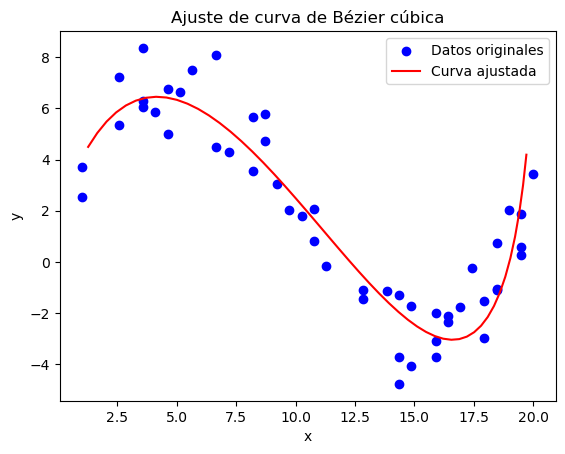

In [638]:
import matplotlib.pyplot as plt

# Graficar los puntos originales
plt.scatter(D[:, 0], D[:, 1], color='blue', label='Datos originales')

# Graficar la curva ajustada
plt.plot(aproximacion[:, 0], aproximacion[:, 1], color='red', label='Curva ajustada')

# Formato del gráfico
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Ajuste de curva de Bézier cúbica')
plt.show()


# Ejercicio 5

In [639]:
# Cargar los datos
D = np.load("archivo_02.npy")
N = len(D)

In [640]:
# Creación de los t
t = np.linspace(0, 1, N)

In [641]:
# Construir la matriz M
M = np.column_stack([(1 - t)**3, 3 * (1 - t)**2 * t, 3 * (1 - t) * t**2, t**3])

# Resolver el sistema de ecuaciones normales
MT_M = M.T @ M
MT_D = M.T @ D

# Obtener los puntos de control
P = np.linalg.solve(MT_M, MT_D)
print(P)

[[ 240.0767367    13.72604701]
 [-283.50219685  443.45349569]
 [ 732.96834961  435.47031685]
 [ 202.42464715   14.09634786]]


In [642]:
# Calcular el error cuadrático total
aproximacion = M @ P
error = np.sum((D - aproximacion)**2)
print(f"Error de aproximación: {error:.4f}")

Error de aproximación: 417040.6086


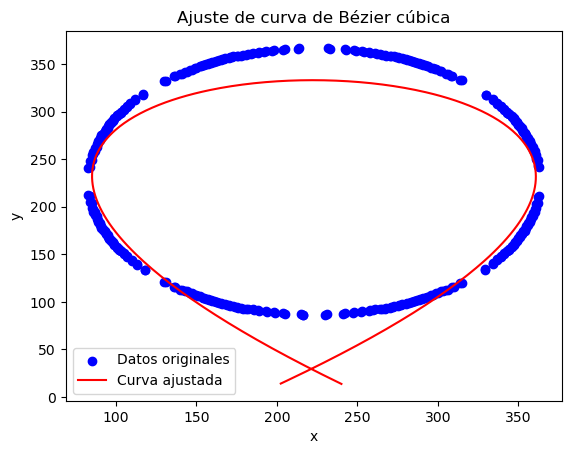

In [643]:
import matplotlib.pyplot as plt

# Graficar los puntos originales
plt.scatter(D[:, 0], D[:, 1], color='blue', label='Datos originales')

# Graficar la curva ajustada
plt.plot(aproximacion[:, 0], aproximacion[:, 1], color='red', label='Curva ajustada')

# Formato del gráfico
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Ajuste de curva de Bézier cúbica')
plt.show()

# Ejercicio 6

### División de los datos en dos grupos

In [653]:
#Buscar el punto medio de los datos para dividirlos en 2 grupos
media_x = np.mean(D[:, 0])

D_left = D[D[:, 0] < media_x]
D_right = D[D[:, 0] >= media_x]

In [654]:
Ms = []
Ps = []
for subset in [D_left, D_right]:
    # Construir la matriz M
    t = np.linspace(0, 1, len(subset))
    M_aux = np.column_stack([(1 - t)**3, 3 * (1 - t)**2 * t, 3 * (1 - t) * t**2, t**3])
    Ms.append(M_aux)

    # Resolver los sistemas de ecuaciones normales
    MT_M_aux = M_aux.T @ M_aux
    MT_D_aux = M_aux.T @ subset

    # Obtener los puntos de control
    P_aux = np.linalg.solve(MT_M_aux, MT_D_aux)
    Ps.append(P_aux)


In [655]:
tags = {0: 'Izquierdo', 1: 'Derecho'}
aproximaciones = []
for i, subset in enumerate([D_left, D_right]):
    aproximacion_aux = Ms[i] @ Ps[i]
    aproximaciones.append(aproximacion_aux)
    error_aux = np.sum((subset - aproximacion_aux)**2)
    print(f"Error de aproximación del conjunto {tags[i]}: {error_aux:.4f}")

Error de aproximación del conjunto Izquierdo: 89733.2389
Error de aproximación del conjunto Derecho: 21621.1076


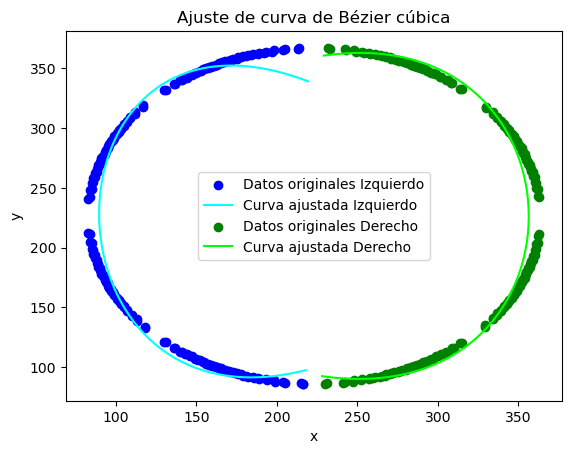

In [656]:
import matplotlib.pyplot as plt

colors1 = {0: 'blue', 1: 'green'}
colors2 = {0: 'cyan', 1: 'lime'}
for i, subset in enumerate([D_left, D_right]):
    # Graficar los puntos originales
    plt.scatter(subset[:, 0], subset[:, 1], color=colors1[i], label=f'Datos originales {tags[i]}')

    # Graficar la curva ajustada
    plt.plot(aproximaciones[i][:, 0], aproximaciones[i][:, 1], color=colors2[i], label=f'Curva ajustada {tags[i]}')

    # Formato del gráfico
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Ajuste de curva de Bézier cúbica')
plt.show()

### Agregando coninuidad $C^0$

In [657]:
#Utilización del código usado en el Trabajo Práctico 1
def matriz_transformacion(puntos_p, puntos_q):
    p0 = np.array(puntos_p[0])
    p3 = np.array(puntos_p[3])
    q0 = np.array(puntos_q[0])
    q3 = np.array(puntos_q[3])
    if (p0[0] == 0 or p0[1]*p3[0] == p0[0]*p3[1]):
        print("La transformación no es posible")
        return
    denom = p0[1]*p3[0] - p0[0]*p3[1]
    a = (-1*p3[1]*q3[0] + p0[1]*q0[0]) / denom
    b = (p3[0]*q3[0] - p0[0]*q0[0]) / denom
    c = (-1*p3[1]*q3[1] + p0[1]*q0[1]) / denom
    d = (p3[0]*q3[1] - p0[0]*q0[1]) / denom
    return np.array([[a, b], [c, d]])

def coef_p3(t):
    return t**3

def coef_p2(t):
    return 3*t**2 - 3*t**3

def coef_p1(t):
    return 3*t**3 - 6*t**2 + 3*t

def coef_p0(t):
    return 3*t**2 - t**3 -3*t + 1

coef0 = np.array([coef_p0(t) for t in t])
coef1 = np.array([coef_p1(t) for t in t])
coef2 = np.array([coef_p2(t) for t in t])
coef3 = np.array([coef_p3(t) for t in t])
def bezier(t, puntos):
    p0 = puntos[0]
    p1 = puntos[1]
    p2 = puntos[2]
    if len(puntos) == 4:
        p3 = puntos[3]
        return coef_p3(t)*p3 + coef_p2(t)*p2 + coef_p1(t)*p1 + coef_p0(t)*p0
    elif len(puntos) == 3:
        return t**2*p2 + (2*t-2*t**2)*p1 + (t**2-2*t+1)*p0

In [683]:
puntos1 = Ps[0]
puntos2 = Ps[1]

# Calcular la matriz de transformación
matriz = matriz_transformacion(puntos1, puntos2)

if not (matriz is None):    
    # Calcular y generar T(x(t))
    nuevos_puntos1 = matriz @ puntos1.T
    nuevos_puntos1 = nuevos_puntos1.T
else:
    print("La transformación no es posible")

#Generar nuevas aproximaciones para la izquierda
Ps[0] = nuevos_puntos1
aproximaciones = []
for i, subset in enumerate([D_left, D_right]):
    aproximacion_aux = Ms[i] @ Ps[i]
    aproximaciones.append(aproximacion_aux)
    error_aux = np.sum((subset - aproximacion_aux)**2)
    print(f"Error de aproximación del conjunto {tags[i]}: {error_aux:.4f}")

aproximacion = np.concatenate(aproximaciones)
D = np.concatenate([D_left, D_right])
error = np.sum((D - aproximacion)**2)
print(f"Error de aproximación: {error:.4f}")


Error de aproximación del conjunto Izquierdo: 169580.6688
Error de aproximación del conjunto Derecho: 21621.1076
Error de aproximación: 191201.7764


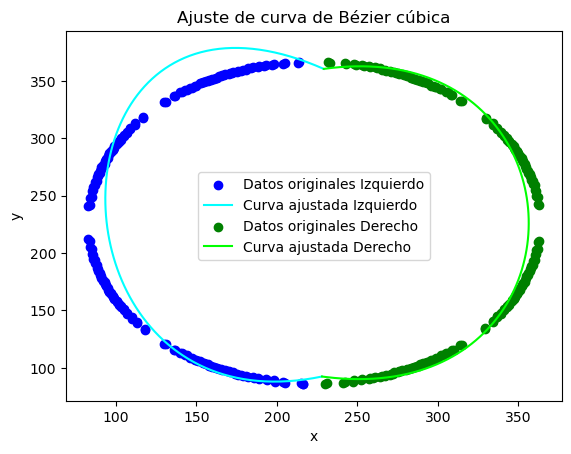

In [666]:
import matplotlib.pyplot as plt

colors1 = {0: 'blue', 1: 'green'}
colors2 = {0: 'cyan', 1: 'lime'}
for i, subset in enumerate([D_left, D_right]):
    # Graficar los puntos originales
    plt.scatter(subset[:, 0], subset[:, 1], color=colors1[i], label=f'Datos originales {tags[i]}')

    # Graficar la curva ajustada
    plt.plot(aproximaciones[i][:, 0], aproximaciones[i][:, 1], color=colors2[i], label=f'Curva ajustada {tags[i]}')

    # Formato del gráfico
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Ajuste de curva de Bézier cúbica')
plt.show()

401


### División de los datos en 4 grupos

Error de aproximación del conjunto I: 30407.1382
Error de aproximación del conjunto II: 4229.5354
Error de aproximación del conjunto III: 4124.0467
Error de aproximación del conjunto IV: 4418.9845


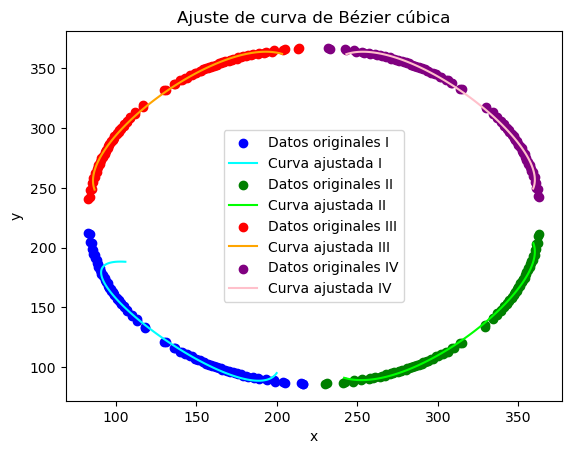

In [652]:
#Buscar el punto medio de x y de y para dividir los datos en 4 grupos
media_x = np.mean(D[:, 0])
media_y = np.mean(D[:, 1])

D_I = D[(D[:, 0] < media_x) & (D[:, 1] < media_y)]
D_II = D[(D[:, 0] >= media_x) & (D[:, 1] < media_y)]
D_III = D[(D[:, 0] < media_x) & (D[:, 1] >= media_y)]
D_IV = D[(D[:, 0] >= media_x) & (D[:, 1] >= media_y)]
grupos = [D_I, D_II, D_III, D_IV]
# Construir la matriz M
Ms = []
Ps = []
for subset in grupos:
    t = np.linspace(0, 1, len(subset))
    M_aux = np.column_stack([(1 - t)**3, 3 * (1 - t)**2 * t, 3 * (1 - t) * t**2, t**3])
    Ms.append(M_aux)

    # Resolver los sistemas de ecuaciones normales
    MT_M_aux = M_aux.T @ M_aux
    MT_D_aux = M_aux.T @ subset

    # Obtener los puntos de control
    P_aux = np.linalg.solve(MT_M_aux, MT_D_aux)
    Ps.append(P_aux)

tags = {0: 'I', 1: 'II', 2: 'III', 3: 'IV'}
colors1 = {0: 'blue', 1: 'green', 2: 'red', 3: 'purple'}
colors2 = {0: 'cyan', 1: 'lime', 2: 'orange', 3: 'pink'}
aproximaciones = []
for i, subset in enumerate(grupos):
    aproximacion_aux = Ms[i] @ Ps[i]
    aproximaciones.append(aproximacion_aux)
    error_aux = np.sum((subset - aproximacion_aux)**2)
    print(f"Error de aproximación del conjunto {tags[i]}: {error_aux:.4f}")
    # Graficar los puntos originales
    plt.scatter(subset[:, 0], subset[:, 1], color=colors1[i], label=f'Datos originales {tags[i]}')

    # Graficar la curva ajustada
    plt.plot(aproximaciones[i][:, 0], aproximaciones[i][:, 1], color=colors2[i], label=f'Curva ajustada {tags[i]}')

# Formato del gráfico
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Ajuste de curva de Bézier cúbica')
plt.show()
